# Preparing file with Estimated population

# First file
PEA04.csv - Estimated Population Number

In [3]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [4]:
# Suppress the warnings
import warnings
warnings.filterwarnings('ignore')

In [59]:
#Creating a DataFrame from file with Estimated Population statistic and displaing random rows
df_pop1 = pd.read_csv("PEA07.csv")
df_pop1.sample(8)

,Statistic Label,Age Group,Sex,Regional Authority Area,Year,UNIT,VALUE
2483,Estimated Population (Persons in April),20 - 24 years,Both sexes,Dublin,2015,Thousand,90.8
10934,Estimated Population (Persons in April),All ages,Male,Midland,1996,Thousand,174.2
259,Estimated Population (Persons in April),0 - 4 years,Male,Midland,2013,Thousand,12.3
10327,Estimated Population (Persons in April),85 years and over,Male,Border,2005,Thousand,2.0
11043,Estimated Population (Persons in April),All ages,Male,Mid-West,2017,Thousand,193.1
9944,Estimated Population (Persons in April),80 - 84 years,Female,Midland,1996,Thousand,2.5
1379,Estimated Population (Persons in April),10 - 14 years,Both sexes,South-West,2011,Thousand,43.3
336,Estimated Population (Persons in April),0 - 4 years,Male,Mid-West,2002,Thousand,12.1


In [49]:
#Explore information about the DataFrame, i.e. nr of rows, nr of not null values, data types for columns, etc...
df_pop1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11286 entries, 0 to 11285
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Statistic Label          11286 non-null  object 
 1   Age Group                11286 non-null  object 
 2   Sex                      11286 non-null  object 
 3   Regional Authority Area  11286 non-null  object 
 4   Year                     11286 non-null  int64  
 5   UNIT                     11286 non-null  object 
 6   VALUE                    11286 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 617.3+ KB


In [60]:
df_pop1.Sex.unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [61]:
#removing rows that reflect data splitted by sex and leaving only data related to both sexes. 

df_pop1 = df_pop1.drop(df_pop1[(df_pop1["Sex"] != "Both sexes")].index)

#Checking and comparing nr of rows

df_pop1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3762 entries, 0 to 10889
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Statistic Label          3762 non-null   object 
 1   Age Group                3762 non-null   object 
 2   Sex                      3762 non-null   object 
 3   Regional Authority Area  3762 non-null   object 
 4   Year                     3762 non-null   int64  
 5   UNIT                     3762 non-null   object 
 6   VALUE                    3762 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 235.1+ KB


In [62]:
pop_grouped1 = df_pop1.groupby("Year")["VALUE"].sum()
pop_grouped1

Year
1996    14504.3
1997    14657.2
1998    14811.9
1999    14966.6
2000    15159.0
2001    15389.1
2002    15668.3
2003    15920.0
2004    16181.1
2005    16535.3
2006    16932.0
2007    17503.8
2008    17940.3
2009    18134.1
2010    18219.0
2011    18299.5
2012    18365.8
2013    18458.6
2014    18582.3
2015    18751.4
2016    18958.5
2017    19170.2
Name: VALUE, dtype: float64

In [63]:
df_pop1 = df_pop1.rename(columns={'VALUE': 'Estimated Population nr','Regional Authority Area': 'Region'})

In [64]:
df_pop1.head()

,Statistic Label,Age Group,Sex,Region,Year,UNIT,Estimated Population nr
0,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1996,Thousand,250.4
1,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1997,Thousand,250.0
2,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1998,Thousand,253.7
3,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,1999,Thousand,259.8
4,Estimated Population (Persons in April),0 - 4 years,Both sexes,State,2000,Thousand,266.2


In [65]:
# In column 'Region' replacing value 'State' with 'Ireland' and 'Midland' with 'Midlands'
df_pop1 = df_pop1.replace('State', 'Ireland')

In [66]:
df_pop1 = df_pop1.replace('Midland', 'Midlands')

In [68]:
pop_grouped = df_pop1.groupby("Year")["Estimated Population nr"].sum()
pop_grouped

Year
1996    14504.3
1997    14657.2
1998    14811.9
1999    14966.6
2000    15159.0
2001    15389.1
2002    15668.3
2003    15920.0
2004    16181.1
2005    16535.3
2006    16932.0
2007    17503.8
2008    17940.3
2009    18134.1
2010    18219.0
2011    18299.5
2012    18365.8
2013    18458.6
2014    18582.3
2015    18751.4
2016    18958.5
2017    19170.2
Name: Estimated Population nr, dtype: float64

In [69]:
#Multipliyng values by 1000
df_pop1['Estimated Population nr'] = df_pop1['Estimated Population nr'].mul(1000)

In [73]:
pop_agg1 = df_pop1.groupby(['Year', 'Region'])['Estimated Population nr'].sum()
pop_agg1 = pop_agg1.reset_index(drop=False)
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_pop1 = pop_agg1.sort_values(by=['Year'], ascending=True)
# Reset the index of the DataFrame 'df_pop'
df_pop1 = df_pop1.reset_index(drop=True)
df_pop1.head()

,Year,Region,Estimated Population nr
0,1996,Border,814500.0
1,1996,Dublin,2116500.0
2,1996,Ireland,7252000.0
3,1996,Mid-East,694800.0
4,1996,Mid-West,634200.0


In [74]:
df_pop1["Year"].unique()

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype=int64)

In [75]:
df_reg = df_pop1.drop(df_pop1[(df_pop1["Region"] == "Ireland") | (df_pop1["Region"] == "Dublin")].index)

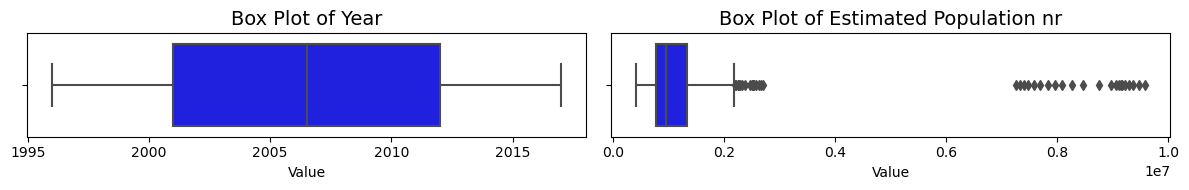

In [104]:
# Creating a figure and axis objects
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 2))

# Flattening the axis to allow for easy iteration
axes = axes.flatten()

# Defining the numerical columns to be plotted
box_plot_cols = df_pop1[[ 'Year', 'Estimated Population nr']]

# Loop through each column to create several box plots
for i, column in enumerate(box_plot_cols.columns):
    sns.boxplot(x = box_plot_cols[column], ax = axes[i], color = 'b')
    axes[i].set_title(f'Box Plot of {column}', fontsize = 14)
    axes[i].set_xlabel('Value')

# Formatting & displaying the plots
plt.tight_layout()
plt.show()

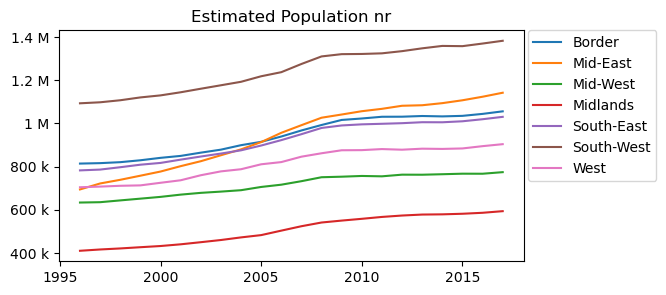

In [76]:
plt.figure(figsize=(6, 3))
for region in df_reg.Region.unique():
    df_region = df_reg[df_reg['Region'] == region]
    plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())
    plt.plot(df_region['Year'], df_region['Estimated Population nr'], label=region)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.03))
    plt.title('Estimated Population nr')

In [114]:
df_filter = df_pop1.drop(df_pop1[(df_pop1["Region"] != "Ireland") & (df_pop1["Region"] != "Dublin")].index)

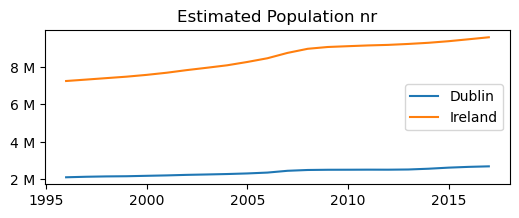

In [115]:
plt.figure(figsize=(6, 2))
for region in df_filter.Region.unique():
    df_region = df_filter[df_filter['Region'] == region]
    plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())
    plt.plot(df_region['Year'], df_region['Estimated Population nr'], label=region)
    plt.legend(loc='right')
    plt.title('Estimated Population nr')

# Second file
PEA04.csv - Estimated Population Number

In [80]:
#Creating a DataFrame from file with Estimated Population statistic and displaing random rows
df_pop = pd.read_csv("PEA04.csv")
df_pop.sample(8)

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,VALUE
3315,Estimated Population (Persons in April),2017,40 - 44 years,Female,Mid-West,Thousand,17.9
3359,Estimated Population (Persons in April),2017,50 - 54 years,Male,West,Thousand,14.7
575,Estimated Population (Persons in April),2012,10 - 14 years,Both sexes,Midland,Thousand,21.1
3928,Estimated Population (Persons in April),2018,60 - 64 years,Male,South-East,Thousand,11.8
711,Estimated Population (Persons in April),2012,35 - 39 years,Male,State,Thousand,182.3
6285,Estimated Population (Persons in April),2023,20 - 24 years,Female,Mid-West,Thousand,16.2
3951,Estimated Population (Persons in April),2018,65 - 69 years,Male,State,Thousand,107.8
921,Estimated Population (Persons in April),2012,75 - 79 years,Both sexes,Mid-West,Thousand,11.4


In [81]:
#Explore information about the DataFrame, i.e. nr of rows, nr of not null values, data types for columns, etc...
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6669 entries, 0 to 6668
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  6669 non-null   object 
 1   Year             6669 non-null   int64  
 2   Age Group        6669 non-null   object 
 3   Sex              6669 non-null   object 
 4   Region           6669 non-null   object 
 5   UNIT             6669 non-null   object 
 6   VALUE            6669 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 364.8+ KB


In [82]:
#removing rows that reflect data splitted by sex and leaving only data related to both sexes. 

df_pop = df_pop.drop(df_pop[(df_pop["Sex"] != "Both sexes")].index)

#Checking and comparing nr of rows

df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2223 entries, 0 to 6650
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  2223 non-null   object 
 1   Year             2223 non-null   int64  
 2   Age Group        2223 non-null   object 
 3   Sex              2223 non-null   object 
 4   Region           2223 non-null   object 
 5   UNIT             2223 non-null   object 
 6   VALUE            2223 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 138.9+ KB


In [83]:
#it should be 1/3 left and it's corerct
6669/3

2223.0

In [84]:
#quick check for left data
df_pop["Sex"].unique()

array(['Both sexes'], dtype=object)

In [85]:
# In column 'Region' replacing value 'State' with 'Ireland' and 'Midland' with 'Midlands'
df_pop = df_pop.replace('State', 'Ireland')

In [86]:
df_pop = df_pop.replace('Midland', 'Midlands')

In [87]:
#Renaming last column with values
df_pop = df_pop.rename(columns={'VALUE': 'Estimated Population nr'})

In [88]:
#Multipliyng values by 1000
df_pop['Estimated Population nr'] = df_pop['Estimated Population nr'].mul(1000)

In [89]:
#Now we have 'Number' as a UNIT
df_pop = df_pop.replace('Thousand', 'Number')

In [90]:
#Checking region values
unique_region_names = df_pop.Region.unique()
unique_region_names

array(['Ireland', 'Border', 'West', 'Mid-West', 'South-East',
       'South-West', 'Dublin', 'Mid-East', 'Midlands'], dtype=object)

In [91]:
#last final check 
df_pop.sample(8)

,STATISTIC Label,Year,Age Group,Sex,Region,UNIT,Estimated Population nr
1168,Estimated Population (Persons in April),2013,25 - 29 years,Both sexes,Mid-East,Number,40400.0
1655,Estimated Population (Persons in April),2014,20 - 24 years,Both sexes,Midlands,Number,16300.0
440,Estimated Population (Persons in April),2011,80 - 84 years,Both sexes,Midlands,Number,4200.0
461,Estimated Population (Persons in April),2011,85 years and over,Both sexes,West,Number,7000.0
6158,Estimated Population (Persons in April),2023,0 - 4 years,Both sexes,West,Number,27500.0
2001,Estimated Population (Persons in April),2014,85 years and over,Both sexes,Mid-West,Number,6600.0
6156,Estimated Population (Persons in April),2023,0 - 4 years,Both sexes,Ireland,Number,293800.0
1087,Estimated Population (Persons in April),2013,10 - 14 years,Both sexes,Mid-East,Number,49500.0


In [92]:
pop_agg = df_pop.groupby(['Year', 'Region'])['Estimated Population nr'].sum()

pop_agg.head()

Year  Region  
2011  Border       784000.0
      Dublin      2523000.0
      Ireland     9149700.0
      Mid-East    1314900.0
      Mid-West     933600.0
Name: Estimated Population nr, dtype: float64

In [93]:
pop_agg = pop_agg.reset_index(drop=False)
pop_agg.head()

,Year,Region,Estimated Population nr
0,2011,Border,784000.0
1,2011,Dublin,2523000.0
2,2011,Ireland,9149700.0
3,2011,Mid-East,1314900.0
4,2011,Mid-West,933600.0


In [94]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df_pop = pop_agg.sort_values(by=['Year'], ascending=True)
# Reset the index of the DataFrame 'df_pop'
df_pop = df_pop.reset_index(drop=True)
df_pop.head()

,Year,Region,Estimated Population nr
0,2011,Border,784000.0
1,2011,Dublin,2523000.0
2,2011,Ireland,9149700.0
3,2011,Mid-East,1314900.0
4,2011,Mid-West,933600.0


In [95]:
df_reg = df_pop.drop(df_pop[(df_pop["Region"] == "Ireland") | (df_pop["Region"] == "Dublin")].index)

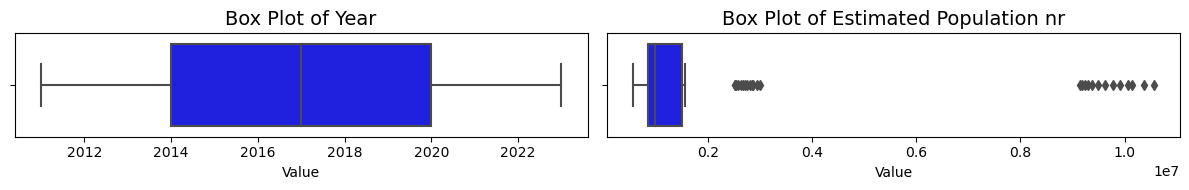

In [20]:
# Creating a figure and axis objects
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(12, 2))

# Flattening the axis to allow for easy iteration
axes = axes.flatten()

# Defining the numerical columns to be plotted
box_plot_cols = df_pop[[ 'Year', 'Estimated Population nr']]

# Loop through each column to create several box plots
for i, column in enumerate(box_plot_cols.columns):
    sns.boxplot(x = box_plot_cols[column], ax = axes[i], color = 'b')
    axes[i].set_title(f'Box Plot of {column}', fontsize = 14)
    axes[i].set_xlabel('Value')

# Formatting & displaying the plots
plt.tight_layout()
plt.show()

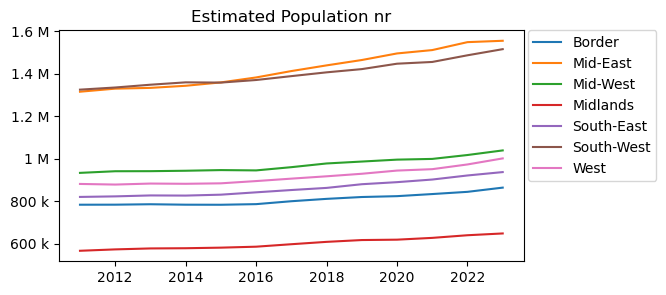

In [96]:
plt.figure(figsize=(6, 3))
for region in df_reg.Region.unique():
    df_region = df_reg[df_reg['Region'] == region]
    plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())
    plt.plot(df_region['Year'], df_region['Estimated Population nr'], label=region)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.03))
    plt.title('Estimated Population nr')

In [97]:
df_filter = df_pop.drop(df_pop[(df_pop["Region"] != "Ireland") & (df_pop["Region"] != "Dublin")].index)

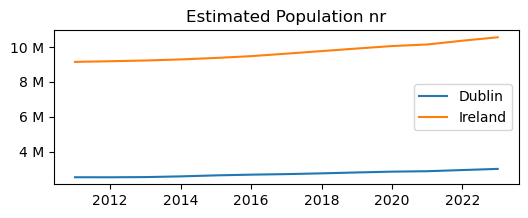

In [112]:
plt.figure(figsize=(6, 2))
for region in df_filter.Region.unique():
    df_region = df_filter[df_filter['Region'] == region]
    plt.gca().yaxis.set_major_formatter(ticker.EngFormatter())
    plt.plot(df_region['Year'], df_region['Estimated Population nr'], label=region)
    plt.legend(loc='right')
    plt.title('Estimated Population nr')

In [23]:
#Export DataFrame to a csv File
df_pop.to_csv("PEA04_c.csv", index = False)

# Combining both data frames

In [106]:
df = pd.concat([df_pop, df_pop1], ignore_index=True)

In [107]:
# Sort the DataFrame 'df_pop' by 'year' in ascending order
df = df.sort_values(by=['Year'], ascending=True)

# Reset the index of the DataFrame 'df_pop'
df = df.reset_index(drop=True)

In [108]:
df.head()

,Year,Region,Estimated Population nr
0,1996,Mid-West,634200.0
1,1996,South-West,1093400.0
2,1996,South-East,783000.0
3,1996,Midlands,411000.0
4,1996,West,704900.0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     315 non-null    int64  
 1   Region                   315 non-null    object 
 2   Estimated Population nr  315 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.5+ KB


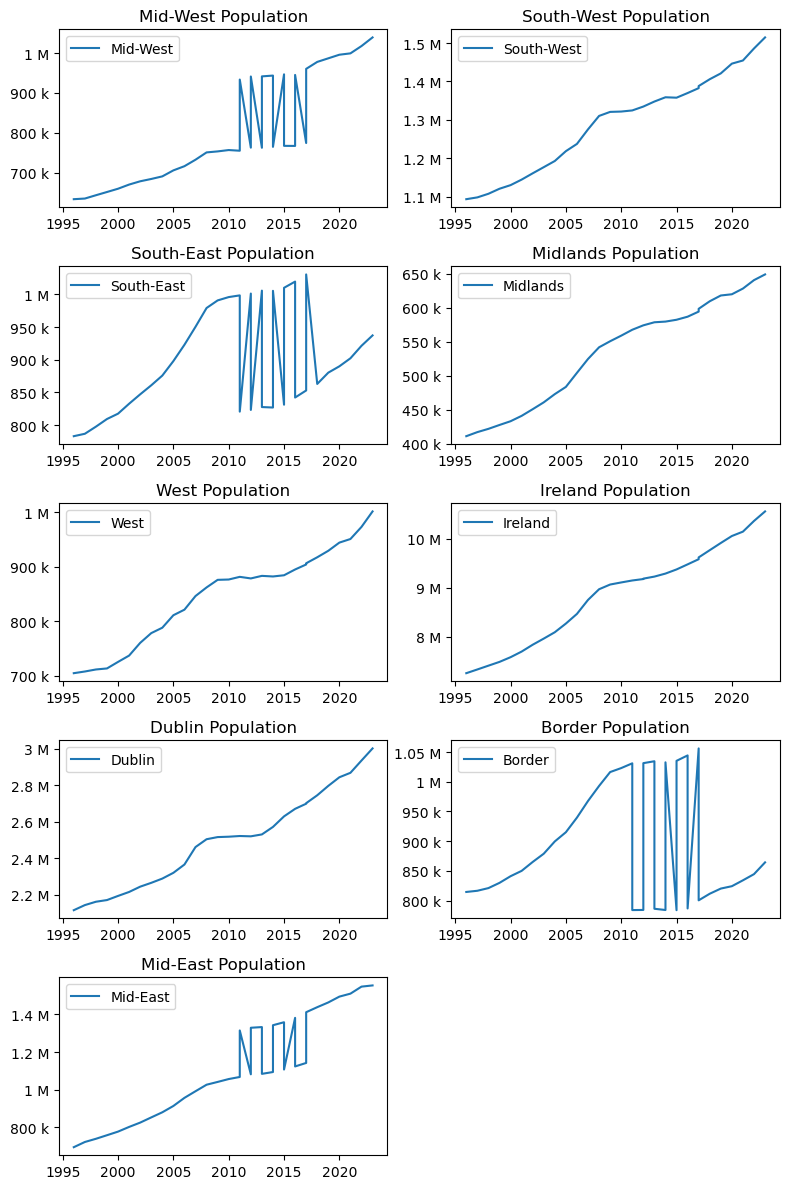

In [110]:
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker


# Create a 2-column grid layout
gs = GridSpec(nrows=5, ncols=2)

# Create a figure
fig = plt.figure(figsize=(8, 12))

# Add subplots to the figure using the grid layout
axs = []
for i, region in enumerate(df['Region'].unique()):
    ax = fig.add_subplot(gs[i])
    axs.append(ax)

# Plot the graphs for each region
for i, region in enumerate(df['Region'].unique()):
    ax = axs[i]

    # Get the subset of the data frame for the current region
    df_region = df[df['Region'] == region]

    # Plot the graph for the current region
    ax.plot(df_region['Year'], df_region['Estimated Population nr'], label=region)
    ax.legend()
    ax.set_title(f'{region} Population')

    # Set the Y axis scale to have readable format for numbers
    formatter = ticker.EngFormatter()
    ax.yaxis.set_major_formatter(formatter)
    
# Adjust the layout of the figure
fig.tight_layout()

# Show the plot
plt.show()

Louth - from Border to Mid-East
South Tipperary from Mid-West to South-East

In [76]:
#Export DataFrame to a csv File
df.to_csv("PEA_c.csv", index = False)